In [1]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from bs4 import BeautifulSoup
import requests
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#This first URL is to obtain the total of pages we will iterate through
#'https://www.trustpilot.com/review/www.axa.co.uk and https://www.trustpilot.com/review/www.axa.co.uk?page=1 work exactly the same '
url= 'https://www.trustpilot.com/review/frontierinsurance.co.uk'
results=requests.get(url)
doc=BeautifulSoup(results.text, 'html.parser')

#Obtains the total of pages
pages=doc.find('a', {'name':'pagination-button-last'})

# total_pages=int(pages.text)
# total_pages
pages


## Obtaining reviews paragraphs

In [ ]:
#Only the paragraphs belonging to the correct class reviews
#paragraphs2=doc.find_all('p',{'class':"typography_typography__QgicV typography_body__9UBeQ typography_color-black__5LYEn typography_weight-regular__TWEnf typography_fontstyle-normal__kHyN3"})


In [ ]:
#text for obtaining the text even if it has breaks <br>
#if I use .string instead of .text returns None when <br> present
# for para in paragraphs2:
#   print(para.text)

## Obtaining the date of the reviews

In [ ]:
# dates=doc.find_all('time')
# len(dates)

## Obtaining data by descendants

In [ ]:
# section=doc.find('section',{'class':"styles_reviewsContainer__3_GQw"})

## Should iterate through these articles
# articles=doc.find_all('article',{'class':"paper_paper__1PY90 paper_square__lJX8a card_card__lQWDv styles_reviewCard__hcAvl"})
# articles=doc.find_all('article',{'class':"paper_paper__1PY90 paper_square__lJX8a card_card__lQWDv styles_reviewCard__hcAvl styles_raised__HxiOi"})

#wrapers are the base, they are the containers of the reviews



In [ ]:
## Obtaining date
# times=wrapers[0].contents[0].contents[1].find('time')
# t=times['datetime']
# fecha=re.search("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", t)
# fecha[0]
# print (datetime.fromisoformat(fecha[0]).date())

In [ ]:
# for w in wrapers[3].contents[1]:
#   print(w)


In [ ]:
# wrapers[3].contents[1].find('p').text

In [ ]:
# for page in range(total_pages):
lista=[]
for page in range(1,2):
# for page in range(1,total_pages+1):

  #print(f'this is page{page}')


  url= f'https://www.trustpilot.com/review/www.axa.co.uk?page={page}'
  results=requests.get(url)
  doc=BeautifulSoup(results.text, 'html.parser')

#wrapers are the base of everything there is on content wrapper of class "styles_reviewContentwrapper__zH_9M
#for every review and they nest rating, time, title and the review text
  wrapers=doc.find_all('section',{'class':"styles_reviewContentwrapper__zH_9M"})
  
  
  for i in range(len(wrapers)):
    #this gets the rating wrapers[i].contents[0]['data-service-review-rating']
    rating=int(wrapers[i].contents[0]['data-service-review-rating'])
    #this gets the date
    times_tag=wrapers[i].contents[0].contents[1].find('time')
    time_string_long=times_tag['datetime']
    time_string_regex=re.search("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", time_string_long)
    time_string_short=time_string_regex[0]
    date= datetime.fromisoformat(time_string_short).date()
    #Review title
    title=wrapers[i].contents[1].find('h2').text
    #Review tex
    if wrapers[i].contents[1].find('p'):
      review=wrapers[i].contents[1].find('p').text
    else:
      review= None


    data=[rating,date,title,review]

    lista.append(data) 
  


In [ ]:
# df=pd.DataFrame(lista,columns=[['Rating', 'Date', 'Title', 'Review']])
df=pd.DataFrame(lista)

In [ ]:
# type(df.Date.loc[0][0])

In [ ]:
df

,0,1,2,3
0,5,2022-07-31,very quick and easy to use.,None
1,5,2022-07-31,Good customer service,Good customer service. Easy to contact without...
2,5,2022-07-31,Website was easy to get around it…,Website was easy to get around it didn't take ...
3,5,2022-07-30,Very helpful gentleman helped me sort…,Very helpful gentleman helped me sort out addi...
4,5,2022-07-30,Changed my car and wanted to update my insurance,Changed my car and wanted to update my insuran...
5,1,2022-07-30,Useless emergency policy,Bought emergency cover for plumbing and drains...
6,3,2022-07-30,Delay in receiving new car insurance documents,Although I received my new insurance certifica...
7,2,2022-07-30,50% more expensive as existing customer…,50% more expensive as existing customer than i...
8,5,2022-07-30,Changed vehicle details with a few…,Changed vehicle details with a few clicks onli...
9,5,2022-07-30,Always willing to sort out your problem,None


In [ ]:
df[1] = pd.to_datetime(df[1]) - pd.to_timedelta(7, unit='d')

# Here the functions starts

In [46]:
def df_creator(url):
  
  #reads the url for the first time
  results=requests.get(url)
  doc=BeautifulSoup(results.text, 'html.parser')
  #Obtains the total of pages
  pages=doc.find('a', {'name':'pagination-button-last'})
  #total_pages=int(pages.string)

  #add this string ?page= to be able to iterate through pages
  new_url=url+'?page='
  lista=[]
  
  for page in range(1,619+1):

    
    url_for_loop= new_url+str(page)
    results=requests.get(url_for_loop)
    doc=BeautifulSoup(results.text, 'html.parser')

  #wrapers are the base of everything there is on content wrapper of class "styles_reviewContentwrapper__zH_9M
  #for every review and they nest rating, time, title and the review text
    wrapers=doc.find_all('section',{'class':"styles_reviewContentwrapper__zH_9M"})
    
    
    for i in range(len(wrapers)):
      #this gets the rating wrapers[i].contents[0]['data-service-review-rating']
      rating=int(wrapers[i].contents[0]['data-service-review-rating'])
      #this gets the date
      times_tag=wrapers[i].contents[0].contents[1].find('time')
      time_string_long=times_tag['datetime']
      time_string_regex=re.search("([0-9]{4}\-[0-9]{2}\-[0-9]{2})", time_string_long)
      time_string_short=time_string_regex[0]
      date= datetime.fromisoformat(time_string_short).date()
      #Review title
      title=wrapers[i].contents[1].find('h2').text
      #Review tex
      if wrapers[i].contents[1].find('p'):

        review=wrapers[i].contents[1].find('p').text
      else:
        review= None


      data=[rating,date,title,review]

      lista.append(data)
    df=pd.DataFrame(lista)
    df[1] = pd.to_datetime(df[1])

  return df


In [23]:
## Use these dataframes for graphics
df_axa=df_creator('https://www.trustpilot.com/review/www.axa.co.uk')

In [55]:
df_axa.columns

RangeIndex(start=0, stop=4, step=1)

In [37]:
df_frontier=df_creator('https://www.trustpilot.com/review/frontierinsurance.co.uk')

In [48]:
df_admiral=df_creator('https://www.trustpilot.com/review/www.admiral.com')

## Saving dataframes to csv files

In [ ]:
df_axa.to_csv('df_axa.csv')
df_frontier.to_csv('df_frontier.csv')
df_admiral.to_csv('df_admiral.csv')


## Read CSV files

In [7]:
df_axa=pd.read_csv('df_axa.csv')
df_frontier=pd.read_csv('df_frontier.csv')
df_admiral=pd.read_csv('df_admiral.csv')

In [17]:
# df_axa.drop('Unnamed: 0')
# df_frontier.drop('Unnamed: 0')
# df_admiral.drop('Unnamed: 0')

## Getting interesting data


1.   Rate average
2.   Comments per day
1.   Comments per week
2.   Date of the last comment
1.   Date of the first 










In [61]:
#Axa
def summary_creator(df):
  rate_average=df[0].mean()
  avarage_comments_day=df.groupby([pd.Grouper(key=1, freq='d')]).count()[3].mean()
  avarage_comments_week=df.groupby([pd.Grouper(key=1, freq='W')]).count()[3].mean()
  date_of_last_comment=df[1].max()
  date_of_first_comment=df[1].min()
  #total_reviews=df.shape[0]

  print(f'''Average rate is {rate_average}
  Average review per day is {avarage_comments_day}
  Average review per week is {avarage_comments_week}
  Last review was posted on {date_of_last_comment})
  First review was posted on {date_of_first_comment}''')

  return rate_average, avarage_comments_day, avarage_comments_week


In [62]:
axa_rate_average, axa_avarage_comments_day, axa_avarage_comments_week=summary_creator(df_axa)

Average rate is 4.369536423841059
  Average review per day is 10.370762711864407
  Average review per week is 71.98529411764706
  Last review was posted on 2022-07-31 00:00:00)
  First review was posted on 2021-04-16 00:00:00


In [63]:
frontier_rate_average, frontier_avarage_comments_day, frontier_avarage_comments_week=summary_creator(df_frontier)

Average rate is 4.694805194805195
  Average review per day is 1.896774193548387
  Average review per week is 13.192307692307692
  Last review was posted on 2022-08-01 00:00:00)
  First review was posted on 2019-08-13 00:00:00


In [64]:
admiral_rate_average, admiral_avarage_comments_day, admiral_avarage_comments_week=summary_creator(df_admiral)

Average rate is 3.1617816091954025
  Average review per day is 6.393762183235867
  Average review per week is 44.32432432432432
  Last review was posted on 2022-07-31 00:00:00)
  First review was posted on 2021-03-06 00:00:00


In [69]:
general_info=[[axa_rate_average, axa_avarage_comments_day, axa_avarage_comments_week],
              [frontier_rate_average, frontier_avarage_comments_day, frontier_avarage_comments_week],
              [admiral_rate_average, admiral_avarage_comments_day, admiral_avarage_comments_week]]

In [91]:
general_info_df=pd.DataFrame(general_info, columns=[['Rate', 'Comments per day(avg)', 'Comments per week(avg)']], index=['AXA','Frontier','Admiral'])

#, index=[['AXA','Frontier','Admiral']]
general_info_df

,Rate,Comments per day(avg),Comments per week(avg)
AXA,4.369536,10.370763,71.985294
Frontier,4.694805,1.896774,13.192308
Admiral,3.161782,6.393762,44.324324


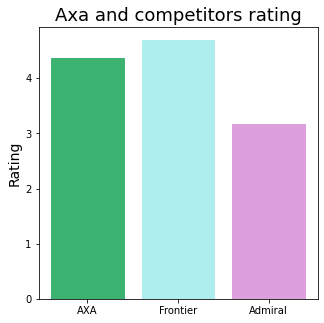

In [119]:
plt.figure(figsize=(5, 5))
barchart=plt.bar(general_info_df.index,general_info_df['Rate'].squeeze())
plt.ylabel('Rating',  fontsize=14)
plt.title('Axa and competitors rating',  fontsize=18)
barchart[0].set_color('mediumseagreen')
barchart[1].set_color('paleturquoise')
barchart[2].set_color('plum')
plt.show()

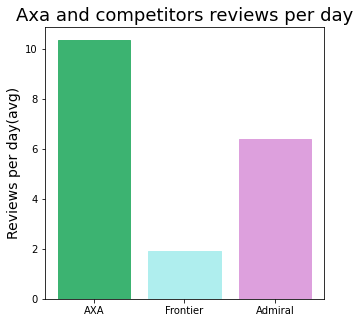

In [123]:
plt.figure(figsize=(5, 5))
barchart=plt.bar(general_info_df.index,general_info_df['Comments per day(avg)'].squeeze())
plt.ylabel('Reviews per day(avg)',  fontsize=14)
plt.title('Axa and competitors reviews per day',  fontsize=18)
barchart[0].set_color('mediumseagreen')
barchart[1].set_color('paleturquoise')
barchart[2].set_color('plum')
plt.show()

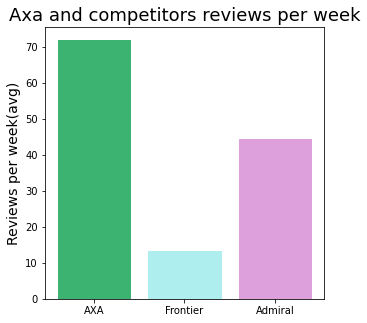

In [129]:
plt.figure(figsize=(5, 5))
barchart=plt.bar(general_info_df.index,general_info_df['Comments per week(avg)'].squeeze())
plt.ylabel('Reviews per week(avg)',  fontsize=14)
plt.title('Axa and competitors reviews per week',  fontsize=18)
barchart[0].set_color('mediumseagreen')
barchart[1].set_color('paleturquoise')
barchart[2].set_color('plum')
plt.show()

In [ ]:
# axa3[1] = pd.to_datetime(axa3[1])
# # axa3[1] = pd.to_datetime(axa3[1]) - pd.to_timedelta(7, unit='d')


In [ ]:
# plt.figure(figsize=(10, 5))
# plt.plot(axa3.groupby([pd.Grouper(key=1, freq='M')])[0].mean())
# plt.show()

Grouping and plotting

In [ ]:
# This is for grouping by week (can be adjusted to month)
# df.groupby([pd.Grouper(key=1, freq='W')])[0].mean()
#This needs to be done before grouping by date!!!!
# df_axa[1] = pd.to_datetime(df_axa[1]) - pd.to_timedelta(7, unit='d')


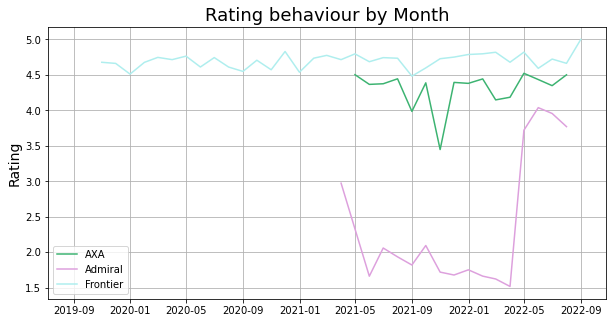

In [137]:

plt.figure(figsize=(10, 5))
plt.plot(df_axa.groupby([pd.Grouper(key=1, freq='M')])[0].mean(), label='AXA', color='mediumseagreen')
plt.plot(df_admiral.groupby([pd.Grouper(key=1, freq='M')])[0].mean(), label='Admiral', color='plum')
plt.plot(df_frontier.groupby([pd.Grouper(key=1, freq='M')])[0].mean(), label='Frontier', color='paleturquoise')
plt.title('Rating behaviour by Month',  fontsize=18)
plt.ylabel('Rating',  fontsize=14)
plt.grid()
plt.legend()

plt.show()